<a href="https://colab.research.google.com/github/devanshee26/hashing-and-security-tradeoff/blob/main/Hashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 8.4 MB/s eta 0:00:00

Hashing Times Comparison:
Password: password
Bcrypt: 322467.57 µs
SHA-256: 24.08 µs
SHA-256 with Salt: 38.86 µs
--------------------------------------------------
Password: password123
Bcrypt: 316083.67 µs
SHA-256: 20.50 µs
SHA-256 with Salt: 30.99 µs
--------------------------------------------------
Password: Password@123
Bcrypt: 319392.68 µs
SHA-256: 21.70 µs
SHA-256 with Salt: 36.48 µs
--------------------------------------------------
Password: P@ssw0rd!#Secure#2024
Bcrypt: 315196.75 µs
SHA-256: 22.89 µs
SHA-256 with Salt: 32.90 µs
--------------------------------------------------


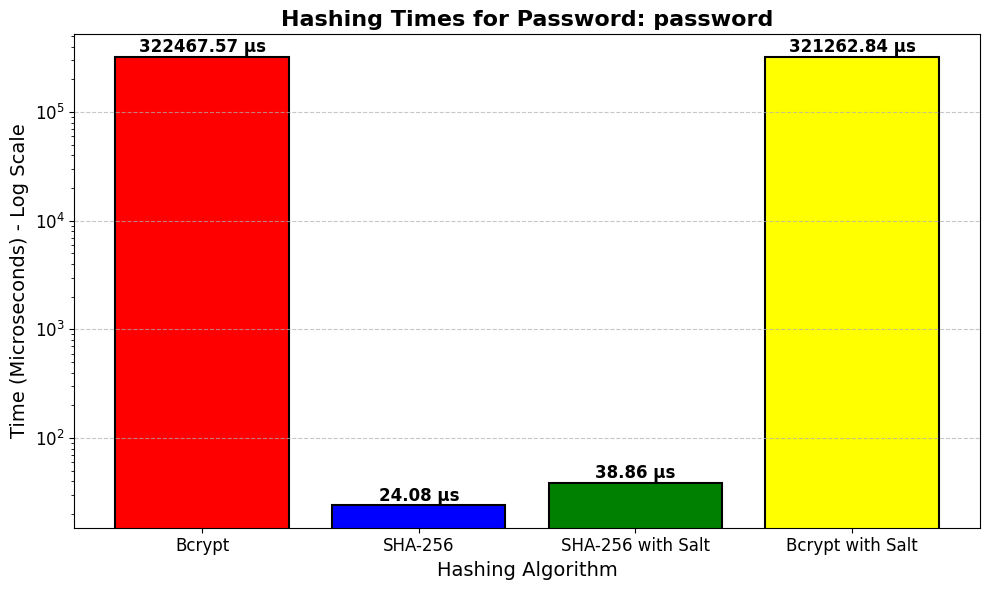

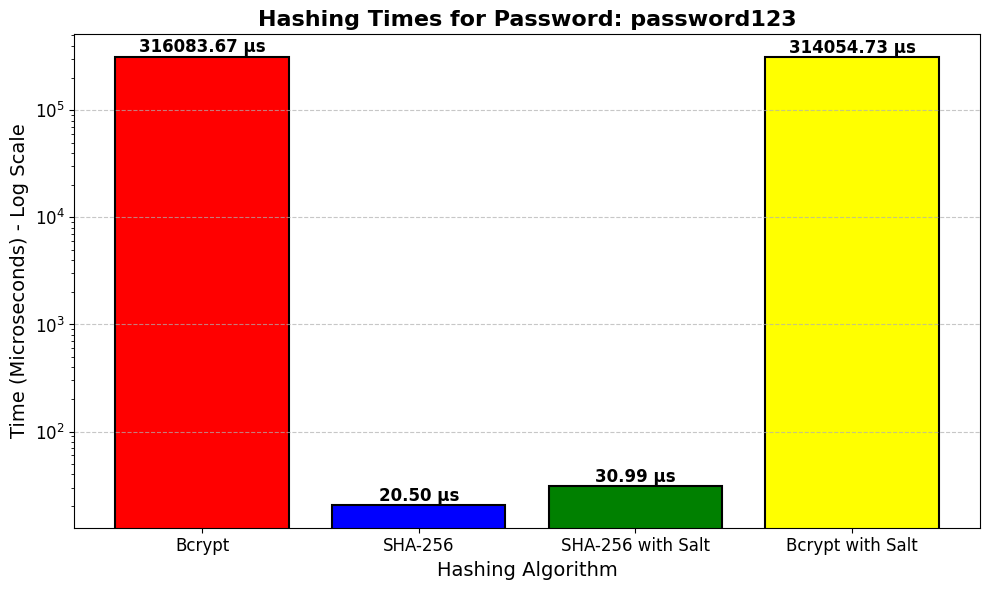

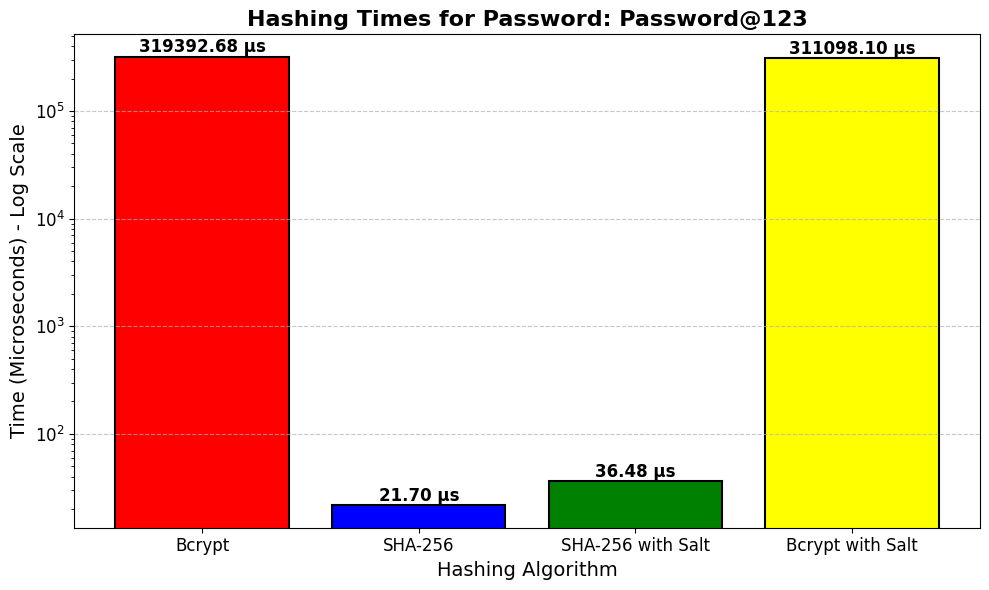

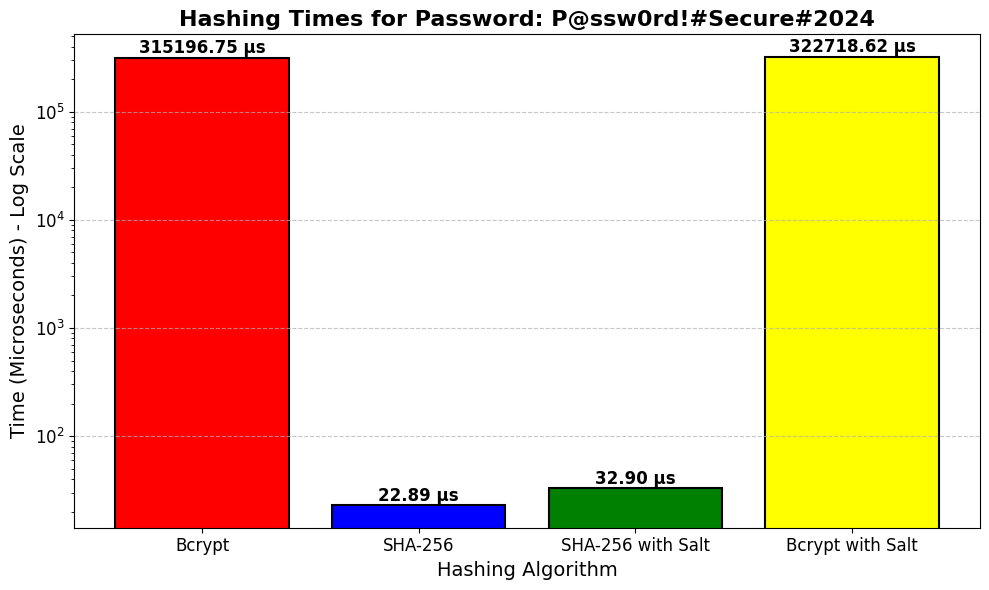

In [ ]:
!pip install bcrypt

#compare the time it takes to hash a simple and a complex password using the following 4 hashing algorithms:
# BCRYPT Hashing
# BCRYPT Hashing with Salt
# SHA-256 Hashing
# SHA-256 with Salt

import bcrypt
import hashlib
import time
import random
import string
import matplotlib.pyplot as plt
import pandas as pd

# Define simple and complex passwords
simple_password = "password123"
complex_password = "P@ssw0rd!#Secure#2024"

# Helper function to generate a random salt
def generate_salt(length=16):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

# Function to hash a password using bcrypt
def bcrypt_hash(password):
    start_time = time.time()
    hashed = bcrypt.hashpw(password.encode(), bcrypt.gensalt())
    return hashed, (time.time() - start_time) * 1e6  # Convert to microseconds

# Function to hash a password using bcrypt with salt
def bcrypt_with_salt(password):
    start_time = time.time()
    salt = generate_salt()
    hashed = bcrypt.hashpw((password+salt).encode(), bcrypt.gensalt())
    return hashed, (time.time() - start_time) * 1e6  # Convert to microseconds

# Function to hash a password using SHA-256
def sha256_hash(password):
    start_time = time.time()
    hashed = hashlib.sha256(password.encode()).hexdigest()
    return hashed, (time.time() - start_time) * 1e6

# Function to hash a password using SHA-256 with salt
def sha256_with_salt(password):
    start_time = time.time()
    salt = generate_salt()
    hashed = hashlib.sha256((salt + password).encode()).hexdigest()
    return hashed, (time.time() - start_time) * 1e6

# Function to compare the hashing times for all algorithms
def compare_hashing_times(passwords):
    results = []

    for password in passwords:
        bcrypt_time = bcrypt_hash(password)[1]
        sha256_time = sha256_hash(password)[1]
        sha256_salt_time = sha256_with_salt(password)[1]
        bcrypt_salt_time = bcrypt_with_salt(password)[1]

        results.append({
            "Password": password,
            "Bcrypt (µs)": bcrypt_time,
            "SHA-256 (µs)": sha256_time,
            "SHA-256 with Salt (µs)": sha256_salt_time,
            "Bcrypt with Salt (µs)": bcrypt_salt_time,
        })

    return results

def plot_hashing_times(results):
    df = pd.DataFrame(results)

    # Bar graph for each password
    for index, row in df.iterrows():
        labels = ["Bcrypt", "SHA-256", "SHA-256 with Salt", "Bcrypt with Salt"]
        times = [row["Bcrypt (µs)"], row["SHA-256 (µs)"], row["SHA-256 with Salt (µs)"], row["Bcrypt with Salt (µs)"]]

        plt.figure(figsize=(10, 6))
        plt.bar(labels, times, color=["red", "blue", "green", "yellow"], edgecolor="black", linewidth=1.5)
        plt.title(f"Hashing Times for Password: {row['Password']}", fontsize=16, fontweight="bold")
        plt.ylabel("Time (Microseconds) - Log Scale", fontsize=14)  # Updated y-axis label
        plt.xlabel("Hashing Algorithm", fontsize=14)

        # Set y-axis to logarithmic scale
        plt.yscale("log")

        for i, time in enumerate(times):
            plt.text(i, time + (time * 0.1), f"{time:.2f} µs", ha="center", fontsize=12, color="black", fontweight="bold")  # Adjusted text position
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

# Main function
def main():
    passwords = ["password", simple_password, "Password@123", complex_password]
    results = compare_hashing_times(passwords)

    print("\nHashing Times Comparison:")
    for result in results:
        print(f"Password: {result['Password']}")
        print(f"Bcrypt: {result['Bcrypt (µs)']:.2f} µs")
        print(f"SHA-256: {result['SHA-256 (µs)']:.2f} µs")
        print(f"SHA-256 with Salt: {result['SHA-256 with Salt (µs)']:.2f} µs")
        print(f"SHA-256 with Salt: {result['SHA-256 with Salt (µs)']:.2f} µs")
        print("-" * 50)

    # Generate graphs
    plot_hashing_times(results)

# Run the main function
if __name__ == "__main__":
    main()
